In [1]:
# Uncomment and run this cell if you're on Colab or Kaggle
# !git clone https://github.com/nlp-with-transformers/notebooks.git
# %cd notebooks
# from install import *
# install_requirements()

import pandas as pd

def detect_abrupt_changes(signal, percent_change, max_time_interval):
    """
    Detect abrupt changes in a time series signal based on the specified parameters.
    
    Parameters:
        signal (pandas.Series): One-dimensional time series signal.
        percent_change (float): The minimum percentage change in the signal range that is considered an abrupt change.
        max_time_interval (int): The maximum time interval in samples between two data points to be considered part of the same change.
    
    Returns:
        pandas.Series: A boolean mask indicating the positions of the abrupt changes in the input signal.
    """
    # Calculate the absolute change in the signal.
    abs_change = abs(signal.diff())
    
    # Calculate the threshold for the minimum change required to be considered an abrupt change.
    change_threshold = (signal.max() - signal.min()) * percent_change
    
    # Initialize a mask of False values to indicate no abrupt changes have been detected yet.
    abrupt_changes = pd.Series(False, index=signal.index)
    
    # Loop over each data point in the signal.
    for i in range(1, len(signal)):
        # If the absolute change is greater than the threshold, mark this data point as the start of an abrupt change.
        if abs_change[i] >= change_threshold:
            abrupt_changes[i] = True
            
            # Keep track of the end of the current change.
            end_of_change = i
            
            # Continue checking subsequent data points to see if they are still part of the same change.
            for j in range(i+1, min(i+max_time_interval, len(signal))):
                if abs_change[j] >= change_threshold:
                    # If the change is still above the threshold, mark this data point as part of the same change.
                    abrupt_changes[j] = True
                    
                    # Update the end of the current change.
                    end_of_change = j
                else:
                    # If the change has fallen below the threshold, stop checking subsequent data points.
                    break
            
            # Skip checking data points that are already part of the current change.
            i = end_of_change
    
    return abrupt_changes

In [2]:
#hide
# from utils import *
# setup_chapter()

import pandas as pd
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Generate a random time series with 1000 data points
signal = pd.Series(np.random.normal(0, 1, 1000), index=pd.date_range('2022-01-01', periods=1000, freq='D'))

# Add some abrupt changes to the time series
signal.loc['2022-02-05':'2022-02-15'] -= 5
signal.loc['2022-03-10':'2022-03-20'] += 3.5
signal.loc['2022-04-05':'2022-04-08'] -= 4

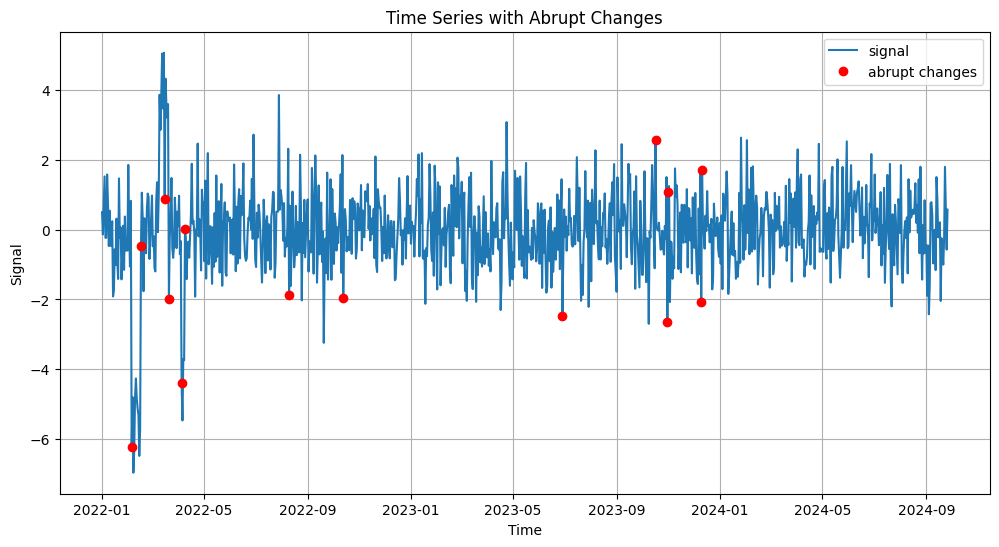

In [3]:
import matplotlib.pyplot as plt

# Plot the time series
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
abrupt_changes = detect_abrupt_changes(signal, 0.3, 10)
abrupt_changes = abrupt_changes.astype(int)
ax.plot(signal[abrupt_changes==1], 'ro', label='abrupt changes')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the plot
plt.show()

In [4]:
import numpy as np

def generate_signal(num_points):
    """
    Generate a stochastic signal with multiple change points in mean and standard deviation.
    """
    s = np.zeros(num_points)
    s = np.concatenate([np.random.normal(loc=0, scale=1, size=num_points // 6),
                              np.random.normal(loc=1.0, scale=1, size=num_points // 6),
                              np.random.normal(loc=1.0, scale=2, size=num_points // 6),   
                              np.random.normal(loc=5, scale=1, size=num_points // 6),
                              np.random.normal(loc=5, scale=2, size=num_points // 6),
                              np.random.normal(loc=-2, scale=1, size=num_points // 6)])
    # Set the random seed for reproducibility

    # Generate a random time series with 1000 data points
    signal = pd.Series(s, index=pd.date_range('2022-01-01', periods=num_points, freq='D'))
    return signal

# Hello Transformers

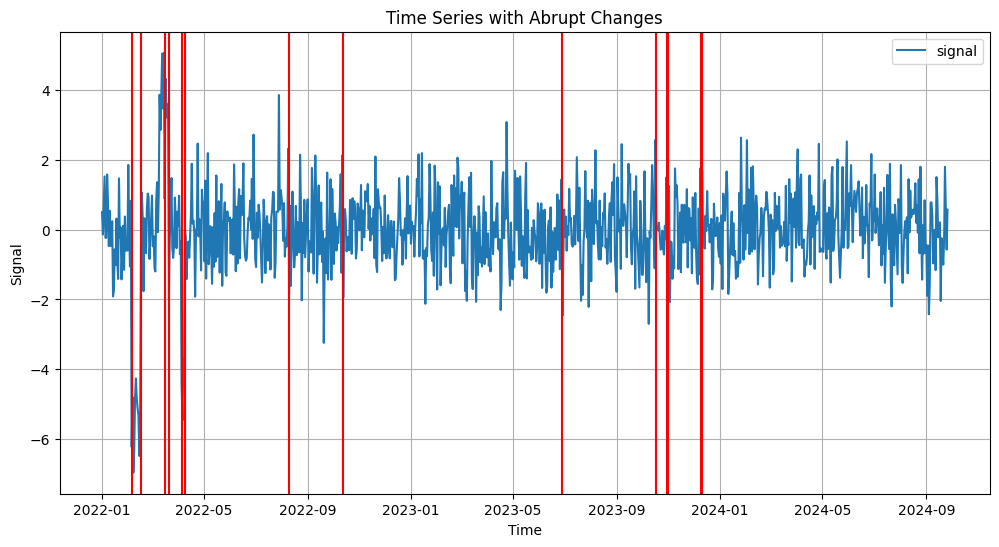

In [5]:
# Detect abrupt changes
abrupt_changes = detect_abrupt_changes(signal, 0.3, 10)
abrupt_changes = abrupt_changes.astype(int)

# Plot the time series 
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(signal, label='signal')

# Plot the abrupt changes
for i in signal.index[abrupt_changes == 1]:
    ax.axvline(i, color='r')

# Add labels, grid, and legend
ax.set_xlabel('Time')
ax.set_ylabel('Signal')
ax.set_title('Time Series with Abrupt Changes')
ax.legend()
ax.grid(True)

# Show the p

<img alt="transformer-timeline" caption="The transformers timeline" src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_timeline.png?raw=1" id="transformer-timeline"/>

## The Encoder-Decoder Framework

<img alt="rnn" caption="Unrolling an RNN in time." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_rnn.png?raw=1" id="rnn"/>

<img alt="enc-dec" caption="Encoder-decoder architecture with a pair of RNNs. In general, there are many more recurrent layers than those shown." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_enc-dec.png?raw=1" id="enc-dec"/>

## Attention Mechanisms

<img alt="enc-dec-attn" caption="Encoder-decoder architecture with an attention mechanism for a pair of RNNs." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_enc-dec-attn.png?raw=1" id="enc-dec-attn"/> 

<img alt="attention-alignment" width="500" caption="RNN encoder-decoder alignment of words in English and the generated translation in French (courtesy of Dzmitry Bahdanau)." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter02_attention-alignment.png?raw=1" id="attention-alignment"/> 

<img alt="transformer-self-attn" caption="Encoder-decoder architecture of the original Transformer." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_self-attention.png?raw=1" id="transformer-self-attn"/> 

## Transfer Learning in NLP

<img alt="transfer-learning" caption="Comparison of traditional supervised learning (left) and transfer learning (right)." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_transfer-learning.png?raw=1" id="transfer-learning"/>  

<img alt="ulmfit" width="500" caption="The ULMFiT process (courtesy of Jeremy Howard)." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_ulmfit.png?raw=1" id="ulmfit"/>

## Hugging Face Transformers: Bridging the Gap

## A Tour of Transformer Applications

In [ ]:
text = """Dear Amazon, last week I ordered an Optimus Prime action figure \
from your online store in Germany. Unfortunately, when I opened the package, \
I discovered to my horror that I had been sent an action figure of Megatron \
instead! As a lifelong enemy of the Decepticons, I hope you can understand my \
dilemma. To resolve the issue, I demand an exchange of Megatron for the \
Optimus Prime figure I ordered. Enclosed are copies of my records concerning \
this purchase. I expect to hear from you soon. Sincerely, Bumblebee."""

### Text Classification

In [ ]:
#hide_output
from transformers import pipeline

classifier = pipeline("text-classification")

In [ ]:
import pandas as pd

outputs = classifier(text)
pd.DataFrame(outputs)    

,label,score
0,NEGATIVE,0.901546


### Named Entity Recognition

In [ ]:
ner_tagger = pipeline("ner", aggregation_strategy="simple")
outputs = ner_tagger(text)
pd.DataFrame(outputs)    

,entity_group,score,word,start,end
0,ORG,0.879010,Amazon,5,11
1,MISC,0.990859,Optimus Prime,36,49
2,LOC,0.999755,Germany,90,97
3,MISC,0.556569,Mega,208,212
4,PER,0.590256,##tron,212,216
5,ORG,0.669692,Decept,253,259
6,MISC,0.498350,##icons,259,264
7,MISC,0.775361,Megatron,350,358
8,MISC,0.987854,Optimus Prime,367,380
9,PER,0.812096,Bumblebee,502,511


### Question Answering 

In [ ]:
reader = pipeline("question-answering")
question = "What does the customer want?"
outputs = reader(question=question, context=text)
pd.DataFrame([outputs])    

,score,start,end,answer
0,0.631291,335,358,an exchange of Megatron


### Summarization

In [ ]:
summarizer = pipeline("summarization")
outputs = summarizer(text, max_length=45, clean_up_tokenization_spaces=True)
print(outputs[0]['summary_text'])

 Bumblebee ordered an Optimus Prime action figure from your online store in
Germany. Unfortunately, when I opened the package, I discovered to my horror
that I had been sent an action figure of Megatron instead.


### Translation

In [ ]:
translator = pipeline("translation_en_to_de", 
                      model="Helsinki-NLP/opus-mt-en-de")
outputs = translator(text, clean_up_tokenization_spaces=True, min_length=100)
print(outputs[0]['translation_text'])

Sehr geehrter Amazon, letzte Woche habe ich eine Optimus Prime Action Figur aus
Ihrem Online-Shop in Deutschland bestellt. Leider, als ich das Paket öffnete,
entdeckte ich zu meinem Entsetzen, dass ich stattdessen eine Action Figur von
Megatron geschickt worden war! Als lebenslanger Feind der Decepticons, Ich
hoffe, Sie können mein Dilemma verstehen. Um das Problem zu lösen, Ich fordere
einen Austausch von Megatron für die Optimus Prime Figur habe ich bestellt.
Anbei sind Kopien meiner Aufzeichnungen über diesen Kauf. Ich erwarte, bald von
Ihnen zu hören. Aufrichtig, Bumblebee.


### Text Generation

In [ ]:
#hide
from transformers import set_seed
set_seed(42) # Set the seed to get reproducible results

In [ ]:
generator = pipeline("text-generation")
response = "Dear Bumblebee, I am sorry to hear that your order was mixed up."
prompt = text + "\n\nCustomer service response:\n" + response
outputs = generator(prompt, max_length=200)
print(outputs[0]['generated_text'])

Dear Amazon, last week I ordered an Optimus Prime action figure from your online
store in Germany. Unfortunately, when I opened the package, I discovered to my
horror that I had been sent an action figure of Megatron instead! As a lifelong
enemy of the Decepticons, I hope you can understand my dilemma. To resolve the
issue, I demand an exchange of Megatron for the Optimus Prime figure I ordered.
Enclosed are copies of my records concerning this purchase. I expect to hear
from you soon. Sincerely, Bumblebee.

Customer service response:
Dear Bumblebee, I am sorry to hear that your order was mixed up. The order was
completely mislabeled, which is very common in our online store, but I can
appreciate it because it was my understanding from this site and our customer
service of the previous day that your order was not made correct in our mind and
that we are in a process of resolving this matter. We can assure you that your
order


## The Hugging Face Ecosystem

<img alt="ecosystem" width="500" caption="An overview of the Hugging Face ecosystem of libraries and the Hub." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_hf-ecosystem.png?raw=1" id="ecosystem"/>

### The Hugging Face Hub

<img alt="hub-overview" width="1000" caption="The models page of the Hugging Face Hub, showing filters on the left and a list of models on the right." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_hub-overview.png?raw=1" id="hub-overview"/> 

<img alt="hub-model-card" width="1000" caption="A example model card from the Hugging Face Hub. The inference widget is shown on the right, where you can interact with the model." src="https://github.com/abeliansw/notebooks/blob/main/images/chapter01_hub-model-card.png?raw=1" id="hub-model-card"/> 

### Hugging Face Tokenizers

### Hugging Face Datasets

### Hugging Face Accelerate

## Main Challenges with Transformers

## Conclusion